In [1]:
import torch
from pathlib import Path
from seq2seq_train import Seq2SeqTrainer

2025-02-27 21:16:46.702573: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-27 21:16:47.562594: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
if torch.cuda.is_available():
    print("cuda")
    torch.cuda.empty_cache()

cuda


In [3]:
    
config = {
    "datasource": 'nllb_segmented_data.csv',
    "batch_size": 64,
    "num_epochs": 100,
    "lr": 10**-5,
    'plateau_patience': 10,  
    'worsen_patience': 5,   
    'min_delta': 0.0005,   
    'verbose': True,
    "data_length": 100000,
    
    # Model architecture parameters
    "seq_len": 310,
    "d_model": 512,        # Dimension of the model
    "num_layers": 6,       # Number of encoder/decoder layers (N)
    "num_heads": 8,        # Number of attention heads (h)
    "d_ff": 2048,         # Dimension of feed-forward network
    "dropout": 0.1,       # Dropout rate
    "max_grad_norm": 1.0,  # Gradient clipping
    "label_smoothing": 0.1,# Label smoothing factor
    
    # Vocabulary and tokenization
    'vocab_size': 30000,
    "tokenize_custom": {
        "english": False,
        "segmenter_one": True
    },
    'tokenize_method': 'segment',
    
    # File paths and model settings
    "file_path": 'english_zulu_models/english_zulu_seg_one',
    "model_folder": "weights",
    "lang_src": "english",
    "lang_tgt": "segmenter_one",
    "model_basename": "model_",
    "preload": "latest",
    "tokenizer_file": "tokenizers_{0}.json",
    "experiment_name": "english_zulu_models/english_zulu_seg_one/tensor_data",
    "random_seed": 20,
}

# Initialize first trainer - this builds vocabulary on full dataset
print("Initializing trainer with full dataset for vocabulary building...")
trainer = Seq2SeqTrainer(config)

# Modify data length for hyperparameter tuning
print("Reducing dataset size for hyperparameter tuning...")
trainer.config["data_length"] = 20000  # Smaller size for quick tuning
tune_trainer = Seq2SeqTrainer(trainer.config)

# Run hyperparameter optimization with small dataset
best_config, analysis = tune_trainer.tune_hyperparameters(
    num_samples=10,  # Number of trials
    num_epochs=5    # Epochs per trial
)

# Now increase dataset size for full training
print("Increasing dataset size for full training...")
tune_trainer.config["data_length"] = 100000  # Larger size for full training
train_trainer = Seq2SeqTrainer(tune_trainer.config)
train_trainer.train()

Initializing trainer with full dataset for vocabulary building...
Using device: cuda
Device name: NVIDIA A100 80GB PCIe
Device memory: 79.253662109375 GB
Original shape: (100000, 3)
Final shape: (100000, 3)
The config file has been saved on translation_trial/eng_zul_seg_one
the dataset length: 100000
Tokenizer path: translation_trial/eng_zul_seg_one/tokenizers/tokenizers_english.json
Tokenizer not found. Creating a new one...
Creating default Tokenizer
Tokenizer path: translation_trial/eng_zul_seg_one/tokenizers/tokenizers_segmenter_one.json
Tokenizer not found. Creating a new one...
Creating custom Segment Tokenizer
Training tokenizer...
Pruning vocabulary...

Vocabulary Stats before pruning:
Total unique tokens: 34709
Tokens after frequency filtering (min_freq=1): 34709
Tokens after size limiting: 29996
Final vocabulary size (including special tokens): 30000
Vocabulary size after pruning: 30000
Vocabulary finalized
Max length of source sentence: 77
Max length of target sentence: 301


2025-02-27 21:17:09,542	INFO worker.py:1821 -- Started a local Ray instance.


/workspace/pytorch-transformer_2/translation_trial/eng_zul_seg_one/ray_results


2025-02-27 21:17:10,650	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
[I 2025-02-27 21:17:10,678] A new study created in memory with name: optuna


(pid=6413) 2025-02-27 21:17:15.309443: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
(pid=6413) To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
(pid=6413) 2025-02-27 21:17:16.148149: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Trial name,epoch,train_loss,val_loss
training_function_1adb1cc0,2,2.65538,2.64381
training_function_20b6add1,4,2.0463,2.04368
training_function_55dc511a,2,5.05589,4.11318
training_function_57661dd3,4,0.645983,0.638553
training_function_67627763,4,0.985756,0.98391
training_function_75e54215,4,2.1218,1.77407
training_function_addeeb7f,4,5.18503,4.66269
training_function_b2a8b0d3,4,2.26075,2.25754
training_function_cbec6aea,2,2.67983,2.66282
training_function_ee2b2bd5,4,1.42693,1.41546


(pid=6802) 2025-02-27 21:33:01.910978: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
(pid=6802) To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
(pid=6802) 2025-02-27 21:33:02.754175: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2025-02-27 21:47:32,823	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 30.19 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to


Best hyperparameters found:
{'lr': 4.447904991816398e-05, 'd_model': 512, 'num_layers': 4, 'num_heads': 16, 'd_ff': 512, 'dropout': 0.2864280352289551, 'label_smoothing': 0.00793992659707945, 'max_grad_norm': 1.2110879744248009}
Increasing dataset size for full training...
Using device: cuda
Device name: NVIDIA A100 80GB PCIe
Device memory: 79.253662109375 GB
Original shape: (100000, 3)
Final shape: (100000, 3)
The config file has been saved on translation_trial/eng_zul_seg_one
the dataset length: 100000
Tokenizer path: translation_trial/eng_zul_seg_one/tokenizers/tokenizers_english.json
Loading existing tokenizer from translation_trial/eng_zul_seg_one/tokenizers/tokenizers_english.json
Tokenizer path: translation_trial/eng_zul_seg_one/tokenizers/tokenizers_segmenter_one.json
Loading existing tokenizer from translation_trial/eng_zul_seg_one/tokenizers/tokenizers_segmenter_one.json
Vocabulary finalized for inference
Max length of source sentence: 77
Max length of target sentence: 301



Processing Epoch 00: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.627]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-a u-a u-a u-a-a u-a-a u-a-a i-a-a i-a-a i-a-a i-a-a-a i-a-a-a i-a-a-a-a i-a-a-a-a-a-a-a i-a-a-a-a-a-a-a-a-a-a-a i-a-a-a-a-a-a-a-a-a-a-a-a-a i-a-a-a-a-a-a-a-a-a e-a-a-a-a-a-a-e-e-a-a-a e-a-a-a-a-a-a-a-a-a-a-a-a-a-a-a-a-a-a e e-a-a-a-a-a-a-a-a-a-a i-a-a e i-a-a-a i-a-a-a-a-a i-a-a-a-a-a-a-a-a-a-a-a-a-a-a-a i
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: u-a u-a u-a-a u-a-a u-a-a-a u-a-a-a i-a-a-a i-a-a-a
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group

Processing Epoch 01: 100%|██████████| 1250/1250 [10:54<00:00,  1.91it/s, loss=0.554]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-m-a u-thi u-m-a u-thi u-m-a u-m-a u-m-a u-m-sebenzi u-m-a u-m-thi u-thi u-m-a u-m-sebenzi u-thi u-m-a u-m-sebenzi u-thi e-ku-m-eni e-m-sebenzi e-m-ntu e-m-thi e-m-thi e-m-thi e-m-khulu e-thi e-m-thi e-m-thi e-m-thi e-m-m-thi e-thi e-m-m-thi e-thi e-m-m-thi e-m-m-m-thi e e-m-m-thi e-m-m-nye e-m-m-thi e-thi e-m-m-m-m-thi e e e-m-m-m-m-thi e-m-thi e-thi e-thi e-ntu e-m-m-m-m-m-m-m-m-m-m-m-m-m
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a
    SOURCE: for a team to 

Processing Epoch 02: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.590]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a n-e-m-nye e-n-e
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: ngi-nga-nga-ngi-thi ngi-thi ngi-thi ngi-nga-nga-nga-nga-nga-nga-n-e-si-khathi ya-ku-nga-nga-nga-nga-nga-n-e-si-khathi
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-ho

Processing Epoch 03: 100%|██████████| 1250/1250 [10:54<00:00,  1.91it/s, loss=0.525]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-a u-m-hlaba o-m-hlaba o-m-hlaba o-m-hlaba o-m-hlaba o-ma-nje e-zin-to ezi-nga-nga-qala e-si-khathi ezi-nga-nga-nga-ma e-si-khathi e-khathi e-si-khathi e-n-o-m-a
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: ngi-ya-ngi-thi ngi-nga-thi ngi-nga-nga-qala i-n-dlela e-mi-nyaka e-mi-nyaka
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-

Processing Epoch 04: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.495]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-m-a u-m-a u-m-a u-m-a uku-thi ngi-nga-thi ngi-nga-kw-az-i uku-thi i-si-khathi esi-nga-phezu ku-phel-a i-zin-to ezi-ningi ezi-y-i-si-khathi ezi-y-i-si-khathi ezi-ningi ezi-y-i-si-khathi ezi-y-i-si-khathi ezi-y-i-si-khathi ezi-d-e e e-zin-hlelo ezi-khulu
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: ngi-ya-ngi-bon-a uku-thi u-m-a u-m-a u-m-a u-m-a e-zin-to ezi-ningi
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-s

Processing Epoch 05: 100%|██████████| 1250/1250 [10:58<00:00,  1.90it/s, loss=0.484]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-m-a u-m-a u-m-a u-m-a ngi-nga-kw-az-i uku-thi u-m-a u-m-a u-m-a u-m-sebenzi we-mi-nyaka e-ntsh-a e-ku-qala u-m-hlaba u-m-a u-m-hlaba we-mi-nyaka e-ntsh-a e-mhlab-eni e-n-kulu
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: ngi-nga-kw-az-i uku-thi u-m-a u-m-a u-m-a i-n-dawo e-mi-nyaka
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-holi njengoba ku-njalo ng-e-s

Processing Epoch 06: 100%|██████████| 1250/1250 [10:54<00:00,  1.91it/s, loss=0.471]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-m-a u-m-a u-m-a ng-o-ku-thi ngi-nga-kw-az-i uku-thi u-m-sebenzi wa-kho uku-thi u-m-sebenzi wa-kho u-m-sebenzi we-si-khathi esi-d-e i-zin-hlelo ezi-d-e ezi-sh-a n-o-ma i-nkampani e-ntsh-a
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: ngi-nga-ku-b-a u-m-a u-m-sebenzi wa-ma-nzi a-ma-nzi a-ma-nzi
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-holi njengoba ku-n

Processing Epoch 07: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.483]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-m-a u-m-a u-nga-kw-az-i uku-thi ngi-thol-e uku-thi u-thol-e i-si-celo esi-nga-thol-a i-si-celo esi-nga-sebenzis-a uku-thi u-m-sebenzi we-bhizinisi lo-ku-sebenz-a i-zin-hlelo ze-zin-hlelo ze-bhizinisi ya-ma-hhala
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: ngi-nga-kw-az-i uku-thi u-m-sebenzi wa-ma-nzi a-ma-nzi
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m

Processing Epoch 08: 100%|██████████| 1250/1250 [10:56<00:00,  1.91it/s, loss=0.417]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-kathi i-n-dlela e-nga-ku-gcin-a ng-o-ku-thi u-thol-e uku-thol-a i-mali e-ntsh-a e-ku-gcin-e-ni uku-thi u-kw-enz-a i-zin-to ezi-ningi ezi-ningi ezi-y-i-n-dawo e-ntsh-a ye-zin-hlelo zo-m-dlalo we-zimali
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: ngi-nga-kw-az-i uku-thi u-m-sebenzi wa-ma-nzi a-ma-nzi
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-holi

Processing Epoch 09: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.419]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-daba e-n-kulu ng-o-ku-thi u-nga-thol-a uku-dlal-a uku-dlal-a i-mi-niningwane e-nga-dlal-i i-zi-thombe ezi-nga-phakath-i kwe-zin-to ezi-ningi ezi-ningi ezi-ningi ezi-ningi i-zin-hlelo ze-zimali ze-zimali e-ntsh-a ng-o-m-dlalo we-vidiyo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: ngi-nga-kw-az-i uku-thi u-m-bono wa-ma-nzi a-ma-nzi
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-y

Processing Epoch 10: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.448]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla u-nga-kw-az-i uku-thi u-nga-thol-a uku-dlal-a i-si-khathi esi-d-e uku-dlal-a i-zinkampani ezi-nga-phans-i kwe-zin-to ezi-ningi ezi-ningi ezi-ningi zo-m-dlalo we-zimali e-maketh-e yo-m-dlalo we-zimali we-zimali
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-kw-az-i uku-b-a u-kw-enz-a ko-dwa a-ma-phoyisa a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo k

Processing Epoch 11: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.417]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla u-nga-kw-az-i uku-thi u-nga-thol-a uku-dlal-a i-qhaz-a e-ku-qal-e-ni uku-dlal-a i-zinkampani ezi-nhl-e ka-khulu ezi-ningi ezi-ningi ezi-ningi ezi-ningi i-zinkampani ezi-ningi zo-m-dlalo we-zimali we-zimali
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-kw-az-i uku-kheth-a ko-dwa a-ma-phoyisa a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e l

Processing Epoch 12: 100%|██████████| 1250/1250 [10:56<00:00,  1.91it/s, loss=0.398]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-n-hlanhla ng-o-ku-thi u-nga-thol-a uku-dlal-a i-qhaz-a e-ku-qal-e-ni kwe-zimali e-ku-dlal-e-ni kwe-zimali ezi-ningi ezi-ningi ezi-ningi zo-ku-xhuman-a n-o-m-dlalo we-zinkampani e-phakem-e yo-m-dlalo we-webhu
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-kw-az-i uku-kheth-a ko-dwa a-ma-phoyisa a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fa

Processing Epoch 13: 100%|██████████| 1250/1250 [10:58<00:00,  1.90it/s, loss=0.396]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-y-i-n-hlanhla u-nga-kw-az-i uku-thi u-nga-thol-a uku-dlal-a ngi-sho uku-dlal-a i-qhaz-a e-ku-gcin-e-ni u-kw-enz-a i-zingxenye ezi-ningi ezi-ningi ezi-ningi ezi-ningi zo-m-dlalo we-zinkampani ezi-ningi ku-akhawunti ya-ma-hhala
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-kw-az-i uku-kheth-a ko-dwa a-ma-phoyisa ko-dwa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e l

Processing Epoch 14: 100%|██████████| 1250/1250 [10:54<00:00,  1.91it/s, loss=0.392]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-ng-enzek-a ng-e-n-hlanhla u-nga-thol-a i-n-hlanhla ngi-sho uku-dlal-a i-qhaz-a e-ku-dlal-e-ni kwe-zimali oku-hl-e ka-khulu u-kw-enz-a i-zingxenye ezi-ningi ezi-ningi zo-m-dlalo we-zimali ku-fanel-e u-khokh-e i-zin-ga lo-m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-kw-az-i uku-kheth-a ko-dwa a-ma-phoyisa a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-f

Processing Epoch 15: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.385]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-ng-u-m-a i-n-hlanhla u-nga-kw-az-i uku-thol-a i-m-pilo ngi-sho uku-dlal-a i-appl-e i-appl-e i-tholakal-e ka-khulu i-zingxenye ezi-ningi ezi-thakazelis-a-yo ka-khulu ku-akhawunti ya-ma-khasino e-maketh-e
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-kw-az-i uku-kheth-a ko-dwa a-ma-phoyisa a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-holi

Processing Epoch 16: 100%|██████████| 1250/1250 [10:58<00:00,  1.90it/s, loss=0.355]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-ng-enzek-a ng-e-n-hlanhla u-nga-s-e u-nga-thol-a i-m-pilo ngi-sho uku-dlal-a i-phorokethi e-fan-a-yo yo-ku-dlal-a oku-ningi oku-thakazelis-a-yo ka-khulu i-zingxenye ezi-thakazelis-a-yo ka-khulu ku-akhawunti ye-khasino y-i-n-hloko yo-m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-kw-az-i uku-kheth-a ko-dwa a-ma-phoyisa a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phume

Processing Epoch 17: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.362]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-ng-u-m-a i-n-hlanhla u-nga-s-e u-nga-thol-a uku-dlal-a i-phorokethi e-vulek-ile yo-kw-enz-a i-zingxenye ezi-thakazelis-a-yo ezi-thakazelis-a-yo ka-khulu e-maketh-e ye-khasino e-vulek-ile u-m-dlalo we-khasino we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-kw-az-i uku-kheth-a ko-dwa a-ma-phoyisa a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li

Processing Epoch 18: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.354]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-ng-u-m-a u-ng-enzek-a ng-e-n-hlanhla u-nga-thol-a uku-dlal-a i-phorokethi yo-ku-dlal-a i-s-enzo ezi-thakazelis-a-yo zo-kw-enz-a i-zingxenye ezi-thakazelis-a-yo ka-khulu e-maketh-e yo-m-dlalo we-khasino we-khasino u-khokh-a i-n-dawo yo-m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-kw-az-i uku-kheth-a ko-dwa a-ma-phoyisa a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phu

Processing Epoch 19: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.403]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-ng-u-n-e-n-hlanhla u-nga-s-e u-nga-thol-a ngi-sho uku-dlal-a i-mali e-vulek-ile yo-kw-enz-a i-mali e-yo-dwa i-ya-jabul-a ka-khulu e-maketh-e ye-khasino e-n-kulu yo-m-dlalo we-khasino u-m-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a a-ma-phoyisa a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-hol

Processing Epoch 20: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.357]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-ng-u-n-e-n-hlanhla u-nga-s-e u-b-e n-e-n-hlanhla ngi-sho uku-thol-a uku-dlal-a i-appl-e i-s-enzo esi-hl-e so-ku-dlal-a i-zingxenye ezi-thakazelis-a-yo ka-khulu e-maketh-e ye-khasino y-i-n-to e-nhle yo-m-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a a-ma-phoyisa a-yi-sebenzis-i a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a

Processing Epoch 21: 100%|██████████| 1250/1250 [10:58<00:00,  1.90it/s, loss=0.352]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-ng-u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-thol-e uku-dlal-a i-appl-e uku-dlal-a i-appl-e i-sebenz-e ka-khulu e-ku-thol-e-ni i-zingxenye ezi-thakazelis-a-yo ka-khulu zo-m-dlalo we-khasino u-m-dlalo we-khasino u-m-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a a-ma-phoyisa a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku

Processing Epoch 22: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.340]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-thol-e ngi-sho uku-dlal-a i-appl-e i-thol-e i-appl-e i-n-o-kw-enz-a oku-hl-e oku-thakazelis-a-yo ka-khulu i-zingxenye ezi-thakazelis-a-yo zo-m-dlalo we-khasino u-m-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a a-ma-phoyisa a-ngu
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a

Processing Epoch 23: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.337]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-thol-e ngi-sho uku-dlal-a i-posi eli-thunyelw-e e-ku-thol-e-ni i-njini yo-ku-thi i-zingxenye ezi-thakazelis-a-yo ka-khulu e-khasino i-khokh-a i-khasino e-n-kulu y-i-n-hloko yo-m-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a a-ma-phoyisa a-ngu
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fan

Processing Epoch 24: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.351]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-fik-e ngi-sho uku-dlal-a i-posi eli-tolo lo-ku-dlal-a oku-nge-nye i-zingxenye ezi-thakazelis-a-yo ka-khulu e-maketh-e ye-khasino e-n-kulu yo-m-dlalo we-khasino u-m-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a a-ma-phoyisa a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li

Processing Epoch 25: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.335]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-fik-e ngi-sho uku-thol-a i-posi eli-tolo lo-ku-dlal-a oku-nge-nye i-zingxenye ezi-thakazelis-a-yo ka-khulu e-zinyang-eni ezi-thakazelis-a-yo ka-khulu zo-m-dlalo we-khasino u-m-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a a-ma-phoyisa a-ngu
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel

Processing Epoch 26: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.373]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-fik-e ngi-sho uku-dlal-a i-tharafikhi e-maketh-e yo-kw-enz-a i-s-enzo esi-thakazelis-a-yo ka-khulu e-maketh-e ye-khasino e-thakazelis-a-yo y-i-khasino u-m-dlalo we-khasino u-m-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a a-ma-phoyisa a-ngu
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel

Processing Epoch 27: 100%|██████████| 1250/1250 [10:59<00:00,  1.90it/s, loss=0.364]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-fik-e ngi-sho n-o-ku-thol-a uku-dlal-a oku-thunyelw-e kwe-zentengiselwano ku-y-enz-a i-zingxenye ezi-thakazelis-a-yo ka-khulu e-khasino i-khokh-a i-khasino i-m-pela u-m-dlalo we-khasino we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-na-so uku-kheth-a ko-dwa a-ma-phoyisa a-ngu
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fan

Processing Epoch 28: 100%|██████████| 1250/1250 [10:54<00:00,  1.91it/s, loss=0.326]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho uku-dlal-a i-posi eli-tolo lo-ku-dlal-a oku-nge-nye i-zingxenye ezi-thakazelis-a-yo ka-khulu e-maketh-e ye-khasino i-khokh-a i-m-dlalo we-khasino y-e m-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-na-ku-kheth-a ko-dwa a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-holi

Processing Epoch 29: 100%|██████████| 1250/1250 [10:59<00:00,  1.90it/s, loss=0.351]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-fik-e ngi-sho uku-dlal-a i-tharafikhi e-qhubek-a-yo u-kw-enz-a i-zingxenye ezi-thakazelis-a-yo ka-khulu e-maketh-e ye-khasino e-thakazelis-a-yo y-i-khasino y-e u-m-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-h

Processing Epoch 30: 100%|██████████| 1250/1250 [10:56<00:00,  1.91it/s, loss=0.349]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-fik-e ngi-sho uku-dlal-a i-tharafikhi e-qhubek-a-yo u-kw-enz-a oku-ny-e i-zingxenye ezi-thakazelis-a-yo ka-khulu e-maketh-e ye-khasino e-ya-jabul-a ng-o-m-dlalo we-khasino o-m-ob-ile
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa a-ma-phoyisa e-n-kulu
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-ho

Processing Epoch 31: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.333]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-fik-e ngi-sho uku-thol-a uku-dlal-a i-tharafikhi e-qhubek-a-yo u-kw-enz-a i-zingxenye ezi-thakazelis-a-yo ka-khulu e-khasino e-ku-jabulel-e-ni u-m-dlalo we-khasino we-khasino o-m-ob-ile we-st
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-h

Processing Epoch 32: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.346]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-fik-e ngi-sho uku-dlal-a i-tharafikhi e-shesh-a-yo u-kw-enz-a oku-ny-e i-zingxenye ezi-thakazelis-a-yo ka-khulu e-khasino i-khokh-a i-khasino e-n-kulu yo-m-dlalo we-khasino y-e
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-holi 

Processing Epoch 33: 100%|██████████| 1250/1250 [11:03<00:00,  1.89it/s, loss=0.318]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-fik-e ngi-sho n-o-ku-thol-a uku-dlal-a oku-thunyelw-e kwe-timu ye-timu e-nge-nye ye-zingxenye ezi-jabulis-a-yo ze-khasino e-ku-khokh-e-ni i-m-dlalo we-khasino y-e i-s-evisi y-e-s-emelik-a
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa a-ma-phoyisa a-yi-sebenzis-i
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-f

Processing Epoch 34: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.314]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-fik-e ngi-sho n-o-ku-thol-a uku-dlal-a oku-thunyelw-e kwe-glyophosate kw-enz-a eny-e ye-zingxenye ezi-thakazelis-a-yo ka-khulu e-khasino i-khokh-a i-m-pela u-m-dlalo we-khasino i-s-evisi y-e-s-emelik-a
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa a-ma-phoyisa e-n-daw-eni ya-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng

Processing Epoch 35: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.339]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-phel-e ngi-sho n-o-ku-thol-a uku-dlal-a oku-thunyelw-e kwe-glyophosate ku-y-enz-a eny-e ye-zingxenye ezi-jabulis-a-yo ze-khasino e-thakazelis-a-yo ka-khulu yo-m-dlalo we-khasino y-e i-s-evisi ya-s-e-s-evisi ya-s-e-s-e-ndaw-eni
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng

Processing Epoch 36: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.307]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho uku-dlal-a i-tharafikhi e-shesh-a-yo u-kw-enz-a eny-e ye-zingxenye ezi-thakazelis-a-yo ka-khulu e-maketh-e ye-khasino e-khokh-a i-m-pela ng-o-m-dlalo we-khasino m-ob-ile
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-b-a ngi-y-e e-ma-phoyis-eni
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-f

Processing Epoch 37: 100%|██████████| 1250/1250 [11:01<00:00,  1.89it/s, loss=0.310]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho uku-dlal-a i-tharafikhi e-qhubek-a-yo u-kw-enz-a oku-ny-e i-zingxenye ezi-jabulis-a-yo ka-khulu e-khasino e-khokh-a i-khasino i-khokh-a i-m-pela m-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a i-n-kosikazi ya-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-

Processing Epoch 38: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.319]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho uku-dlal-a i-grand post o-kw-enz-a lo-kho o-muny-e we-zingxenye ezi-jabulis-a-yo ka-khulu e-khasino e-khokh-a i-khasino e-khokh-a i-m-pela m-dlalo we-khasino y-angases-e
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u

Processing Epoch 39: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.316]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-phel-e ngi-sho n-o-ku-thol-a uku-dlal-a oku-tolo oku-qhubek-a-yo kwe-nsimbi u-kw-enz-a oku-ny-e i-zingxenye ezi-thakazelis-a-yo ze-khasino e-ya-thakazelis-a ka-khulu ng-o-m-dlalo we-khasino u-m-dlalo we-s-elula
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a uku-b-a ngi-y-e n-e-soka la-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-s

Processing Epoch 40: 100%|██████████| 1250/1250 [10:54<00:00,  1.91it/s, loss=0.314]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho uku-dlal-a i-grand post o-f th-e xax-a u-kw-enz-a oku-ny-e i-zingxenye ezi-jabulis-a-yo ze-khasino e-thakazelis-a-yo ye-khasino i-khokh-e ng-u-m-dlalo we-ndawo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-thukuthel-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-hol

Processing Epoch 41: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.305]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho uku-dlal-a i-tharafikhi e-qhubek-a-yo u-kw-enz-a oku-ny-e i-zingxenye ezi-thakazelis-a-yo ze-khasino e-thakazelis-a-yo i-khasino i-khokh-a i-m-pela m-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-b-a ngi-thukuthel-e a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku

Processing Epoch 42: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.332]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla u-nga-s-e u-phel-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand post o-kw-enz-a-yo eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu e-khasino e-khokh-a i-khasino y-e-khasino ng-o-m-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-b-a ngi-thukuthel-e a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw

Processing Epoch 43: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.302]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla u-nga-s-e u-phel-e ngi-sho n-o-ku-thol-a uku-dlal-a oku-qhubek-a-yo kwe-grand jackot e-kw-enz-e-ni eny-e ye-zingxenye ezi-jabulis-a-yo ze-khasino e-ya-thakazelis-a ka-khulu yo-m-dlalo we-khasino y-e s-lot
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e k-eph-a uku-khal-a kwa-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li

Processing Epoch 44: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.316]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-phel-e ngi-sho n-o-ku-thol-a uku-dlal-a oku-qhubek-a-yo kwe-grand jackot e-kw-enz-e-ni eny-e ye-zingxenye ezi-jabulis-a-yo ze-khasino e-ku-jabulel-e-ni u-m-dlalo we-khasino ng-o-m-dlalo we-s-elula
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-b-a ngi-khal-e a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumel

Processing Epoch 45: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.298]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho uku-thol-a uku-dlal-a i-grand post u-kw-enz-a lo-kho o-muny-e we-zingxenye ezi-jabulis-a-yo ze-khasino e-ya-thakazelis-a ka-khulu uku-khokh-a u-m-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a kwa-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-hol

Processing Epoch 46: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.307]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a oku-ny-e i-zingxenye ezi-jabulis-a-yo ze-khasino e-nhle ka-khulu ye-khasino i-khokh-a u-m-dlalo we-s-evisi ya-s-e-s-elul-a
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a kwa-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fan

Processing Epoch 47: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.298]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a eny-e ye-zingxenye ezi-jabulis-a-yo ezi-jabulis-a-yo ze-khasino e-khokh-a i-m-pela ng-o-m-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a kwa-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u

IOPub message rate exceeded.███████▋| 1208/1250 [10:35<00:21,  1.94it/s, loss=0.282]
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Processing Epoch 57: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.270]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a i-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino e-khokh-a i-m-pela ng-o-m-dlalo we-s-elula
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a kwa-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-

Processing Epoch 58: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.319]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino a-khokh-e i-m-pela m-ob-ile s-lot o-f m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a kwa-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li

Processing Epoch 59: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.290]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino i-khokh-a i-m-pela m-ob-ile s-lot o-f m-ob-ile
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a kwa-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-h

Processing Epoch 60: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.292]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a lo-khu eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino i-khokh-a ng-o-m-dlalo we-s-elula
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a kwa-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw

Processing Epoch 61: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.296]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino e-khokh-a i-s-elul-a ng-o-m-dlalo we-s-elula
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a kwa-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-

Processing Epoch 62: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.283]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo e-kw-enz-e-ni eny-e ye-zingxenye ezi-jabulis-a-yo ze-khasino e-khokh-a i-s-elul-a ng-o-m-dlalo s-lot o-f s-lot
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a kwa-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-h

Processing Epoch 63: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.284]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino i-khokh-a i-s-amb-a s-lot o-m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a kwa-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-

Processing Epoch 64: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.305]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot o-qhubek-a-yo u-kw-enz-a ng-e-nye ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino i-khokh-e i-s-amb-a se-m-pahla s-s-lot
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-

Processing Epoch 65: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.278]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a ku-b-e ng-e-nye ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino i-khokh-e i-s-elul-a s-lot m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-ho

Processing Epoch 66: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.289]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot o-qhubek-a-yo u-kw-enz-a ku-b-e eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino e-khokh-a ng-o-m-dlalo we-s-elula
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a kwa-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw

Processing Epoch 67: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.274]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino a-khokh-e i-s-elula m-ob-ile
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-holi nj

Processing Epoch 68: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.287]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-jackot e-qhubek-a-yo u-kw-enz-a lo-khu eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino i-khokh-e i-s-elul-a ng-o-m-dlalo we-s-elula
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-h

Processing Epoch 69: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.272]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino a-khokh-e s-s-lot o-m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-holi nje

Processing Epoch 70: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.283]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a lo-khu eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino a-khokh-e i-s s-lot o-m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m

Processing Epoch 71: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.288]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a lo-kho o-muny-e we-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino a-khokh-e i-s s-lot m-ob-ile
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u

Processing Epoch 72: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.258]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino i-khokh-e i-s-lot o-m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-holi nje

Processing Epoch 73: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.297]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-jackot e-qhubek-a-yo u-kw-enz-a lo-khu oku-thakazelis-a-yo ka-khulu kwe-khasino i-khokh-e i-s-lot m-ob s-lot o-f m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-holi njen

Processing Epoch 74: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.282]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a lo-khu kwe-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino a-khokh-e i-s-lot o-f m-ob-ile
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-hol

Processing Epoch 75: 100%|██████████| 1250/1250 [10:53<00:00,  1.91it/s, loss=0.271]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot esi-qhubek-a-yo u-kw-enz-a ku-b-e ng-e-nye ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino uku-khokh-a i-s-elul-a s-lot m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e l

Processing Epoch 76: 100%|██████████| 1250/1250 [10:56<00:00,  1.90it/s, loss=0.266]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot o-qhubek-a-yo u-kw-enz-a ku-b-e ng-e-nye ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino uku-khokh-a i-s-elul-a s-lot m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-

Processing Epoch 77: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.285]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a ku-b-e eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino uku-khokh-a i-s-amb-a se-s-lot m-ob-ile
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-

Processing Epoch 78: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.275]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a ku-b-e eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino uku-khokh-a i-s-lot m-ob-ile
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-

Processing Epoch 79: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.283]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a ku-b-e ng-e-nye ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino uku-khokh-a i-s-elula s-lot m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-h

Processing Epoch 80: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.296]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a lo-khu ng-e-nye ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino a-khokh-e i-s s-lot m-ob
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-m-h

Processing Epoch 81: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.281]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a ku-b-e eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino uku-khokh-a s-lot o-f m-ob-ile
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a u-

Processing Epoch 82: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.267]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a ku-b-e ng-e-nye ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino uku-khokh-a s-lot o-f m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a 

Processing Epoch 83: 100%|██████████| 1250/1250 [10:54<00:00,  1.91it/s, loss=0.289]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a ku-b-e ng-e-nye ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino uku-khokh-a s-s-lot o-f m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-

Processing Epoch 84: 100%|██████████| 1250/1250 [10:55<00:00,  1.91it/s, loss=0.265]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-grand jackot e-qhubek-a-yo u-kw-enz-a ku-b-e ng-e-nye ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino uku-khokh-a s-lot o-f m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li-holw-a 

Processing Epoch 85: 100%|██████████| 1250/1250 [10:57<00:00,  1.90it/s, loss=0.256]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-jackot e-qhubek-a-yo u-kw-enz-a ku-b-e eny-e ye-zingxenye ezi-jabulis-a-yo ka-khulu ze-khasino i-khokh-e i-s s-lot m-ob-ile s-lot o-f m-dlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li

Processing Epoch 86: 100%|██████████| 1250/1250 [10:58<00:00,  1.90it/s, loss=0.274]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackot oku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e i-zingxenye ejabulis-a ka-khulu w-e pay- ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: u-m-a u-n-e-n-hlanhla ng-e-m-pela u-nga-s-e u-gcin-e ngi-sho n-o-ku-thol-a uku-dlal-a i-jackot e-qhubek-a-yo u-kw-enz-a lo-khu o-muny-e we-zingxenye ezi-jabulis-a-yo ka-khulu e-khasino a-khokh-e i-s s-lot m-ob-ile s-lot o-f gam-e
    SOURCE: i had no choice but to ring the police
    TARGET: ng-a-ngi-nge-na-ku-kheth-a ko-dwa uku-biz-a a-ma-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a a-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: uku-z-e i-qembu li-sebenz-e ng-o-ku-phumelel-a-yo ku-fanel-e li

IOPub message rate exceeded.█████▍  | 937/1250 [08:11<02:42,  1.93it/s, loss=0.255]
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

(pid=12856) 2025-02-28 15:30:33.300668: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
(pid=12856) To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
(pid=12856) 2025-02-28 15:30:34.267822: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
(pid=13099) 2025-02-28 15:36:19.422244: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instr

In [4]:

if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Initial config with small dataset for tuning
config = {
    # Data and training parameters
    "datasource": 'nllb_segmented_data.csv', #ensure correct path 
    "batch_size": 64,
    "num_epochs": 100,
    "lr": 10**-5,
    'plateau_patience': 10,  # New for plateau detection
    'worsen_patience': 5,   # New for worsen detection
    'min_delta': 0.0005,    # Minimum improvement for loss
    'verbose': True,
    "data_length": 100000,
    
    # Model architecture parameters
    "seq_len": 300,
    "d_model": 512,        # Dimension of the model
    "num_layers": 6,       # Number of encoder/decoder layers (N)
    "num_heads": 8,        # Number of attention heads (h)
    "d_ff": 2048,         # Dimension of feed-forward network
    "dropout": 0.1,       # Dropout rate
    "max_grad_norm": 1.0,  # Gradient clipping
    "label_smoothing": 0.1,# Label smoothing factor
    
    # Vocabulary and tokenization
    'vocab_size': 30000,
    "tokenize_custom": {
        "english": False,
        "segmenter_two": True
    },
    'tokenize_method': 'segment',
    
    # File paths and model settings
    "file_path": 'english_zulu_models/english_zulu_seg_two',
    "model_folder": "weights",
    "lang_src": "english",
    "lang_tgt": "segmenter_two",
    "model_basename": "model_",
    "preload": "latest",
    "tokenizer_file": "tokenizers_{0}.json",
    "experiment_name": "english_zulu_models/english_zulu_seg_two/tensor_data",
    "random_seed": 20,
}

# Initialize first trainer - this builds vocabulary on full dataset
print("Initializing trainer with full dataset for vocabulary building...")
trainer = Seq2SeqTrainer(config)

# Modify data length for hyperparameter tuning
print("Reducing dataset size for hyperparameter tuning...")
trainer.config["data_length"] = 20000  # Smaller size for quick tuning
tune_trainer = Seq2SeqTrainer(trainer.config)

# Run hyperparameter optimization with small dataset
best_config, analysis = tune_trainer.tune_hyperparameters(
    num_samples=10,  # Number of trials
    num_epochs=5    # Epochs per trial
)

# Now increase dataset size for full training
print("Increasing dataset size for full training...")
tune_trainer.config["data_length"] = 100000  # Larger size for full training
train_trainer = Seq2SeqTrainer(tune_trainer.config)
train_trainer.train()

Initializing trainer with full dataset for vocabulary building...
Using device: cuda
Device name: NVIDIA A100 80GB PCIe
Device memory: 79.253662109375 GB
Original shape: (100000, 3)
Final shape: (100000, 3)
The config file has been saved on translation_trial/eng_zul_seg_two
the dataset length: 100000
Tokenizer path: translation_trial/eng_zul_seg_two/tokenizers/tokenizers_english.json
Tokenizer not found. Creating a new one...
Creating default Tokenizer
Tokenizer path: translation_trial/eng_zul_seg_two/tokenizers/tokenizers_segmenter_two.json
Tokenizer not found. Creating a new one...
Creating custom Segment Tokenizer
Training tokenizer...
Pruning vocabulary...

Vocabulary Stats before pruning:
Total unique tokens: 35960
Tokens after frequency filtering (min_freq=1): 35960
Tokens after size limiting: 29996
Final vocabulary size (including special tokens): 30000
Vocabulary size after pruning: 30000
Vocabulary finalized
Max length of source sentence: 77
Max length of target sentence: 275


2025-02-28 15:30:29,609	INFO worker.py:1654 -- Calling ray.init() again after it has already been called.
2025-02-28 15:30:29,738	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
[I 2025-02-28 15:30:29,748] A new study created in memory with name: optuna


/workspace/pytorch-transformer_2/translation_trial/eng_zul_seg_two/ray_results


Trial name,epoch,train_loss,val_loss
training_function_0372cd6e,4,2.12946,2.12172
training_function_214e0612,4,4.31808,3.75097
training_function_2dd1c7f7,4,1.45786,1.44621
training_function_385b4581,2,5.87167,5.14338
training_function_5af08059,4,2.56991,2.5581
training_function_5bbaa2ab,4,1.10499,1.08823
training_function_66188efc,4,1.73642,1.72933
training_function_7e1cd518,2,7.47478,6.97111
training_function_aa223f73,4,2.75708,2.74576
training_function_d8ec5086,4,1.29761,1.29672


2025-02-28 17:09:32,460	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/workspace/pytorch-transformer_2/translation_trial/eng_zul_seg_two/ray_results/transformer_tune' in 0.0241s.
2025-02-28 17:09:32,467	INFO tune.py:1041 -- Total run time: 5942.73 seconds (5942.68 seconds for the tuning loop).



Best hyperparameters found:
{'lr': 0.0006359433907481593, 'd_model': 128, 'num_layers': 3, 'num_heads': 8, 'd_ff': 512, 'dropout': 0.2014839522318298, 'label_smoothing': 0.04842282275511085, 'max_grad_norm': 0.8615842191684886}
Increasing dataset size for full training...
Using device: cuda
Device name: NVIDIA A100 80GB PCIe
Device memory: 79.253662109375 GB
Original shape: (100000, 3)
Final shape: (100000, 3)
The config file has been saved on translation_trial/eng_zul_seg_two
the dataset length: 100000
Tokenizer path: translation_trial/eng_zul_seg_two/tokenizers/tokenizers_english.json
Loading existing tokenizer from translation_trial/eng_zul_seg_two/tokenizers/tokenizers_english.json
Tokenizer path: translation_trial/eng_zul_seg_two/tokenizers/tokenizers_segmenter_two.json
Loading existing tokenizer from translation_trial/eng_zul_seg_two/tokenizers/tokenizers_segmenter_two.json
Vocabulary finalized for inference
Max length of source sentence: 77
Max length of target sentence: 275

T

IOPub message rate exceeded.████▉   | 863/1250 [02:03<00:55,  6.95it/s, loss=1.132]
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Processing Epoch 26: 100%|██████████| 1250/1250 [03:02<00:00,  6.86it/s, loss=0.889]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma u-ne-n-hlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto o-ku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e izing-xenye e-jabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma u-ne-n-hlanhla nge-mpela u-nga-s-e u-gcin-e ngi-sho no-ku-thol-a uku-dlal-a jackoto o-qhubek-a-yo o-kw-enz-a eny-e ye-zingxenye e-zi-thakazelis-a-yo ka-khulu ze-khasino e-jabulis-a-yo um-dlalo we-khasino e-jabulis-a-yo um-dlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ngangi-nge-na-ku-kheth-a ko-dwa uku-biz-a ama-phoyisa
 PREDICTED: a-ngi-na-ku-kheth-a ko-dwa ngi-khal-e ama-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e i-qembu li-sebenz-e ngo-ku-phumelel-a-yo ku-fanel-e li

Processing Epoch 27: 100%|██████████| 1250/1250 [03:01<00:00,  6.88it/s, loss=0.882]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma u-ne-n-hlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto o-ku-qhubek-a-yo o-kw-enz-a ku-b-e o-muny-e izing-xenye e-jabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma u-ne-n-hlanhla nge-mpela unga-gcin-a ngi-sho no-ku-thol-a uku-dlal-a i-jackoto e-qhubek-a-yo o-kw-enz-a eny-e ye-zingxenye e-zi-jabulis-a-yo ka-khulu ye-khasino e-jabulis-a-yo ngo-m-dlalo we-khasino y-e-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ngangi-nge-na-ku-kheth-a ko-dwa uku-biz-a ama-phoyisa
 PREDICTED: a-ngi-zang-e ngi-kheth-e ko-dwa uku-khal-a kwa-ma-phoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e i-qembu li-sebenz-e ngo-ku-phumelel-a-yo ku-fanel-e li-holw-a um-holi njen

IOPub message rate exceeded.        | 221/1250 [00:32<02:27,  6.99it/s, loss=0.852]
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Initializing trainer with full dataset for vocabulary building...
Using device: cuda
Device name: NVIDIA A100 80GB PCIe
Device memory: 79.253662109375 GB
Original shape: (100000, 3)
Final shape: (100000, 3)
The config file has been saved on translation_trial/eng_zul_seg_three
the dataset length: 100000
Tokenizer path: translation_trial/eng_zul_seg_three/tokenizers/tokenizers_english.json
Tokenizer not found. Creating a new one...
Creating default Tokenizer
Tokenizer path: translation_trial/eng_zul_seg_three/tokenizers/tokenizers_segmenter_three.json
Tokenizer not found. Creating a new one...
Creating custom Segment Tokenizer
Training tokenizer...
Pruning vocabulary...

Vocabulary Stats before pruning:
Total unique tokens: 58083
Tokens after frequency filtering (min_freq=1): 58083
Tokens after size limiting: 29996
Final vocabulary size (including special tokens): 30000
Vocabulary size after pruning: 30000
Vocabulary finalized
Max length of source sentence: 77
Max length of target senten

2025-02-28 18:54:10,894	INFO worker.py:1654 -- Calling ray.init() again after it has already been called.
2025-02-28 18:54:11,013	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
[I 2025-02-28 18:54:11,023] A new study created in memory with name: optuna


/workspace/pytorch-transformer_2/translation_trial/eng_zul_seg_three/ray_results


Trial name,epoch,train_loss,val_loss
training_function_311e7990,4,1.12628,1.12196
training_function_317d5736,4,2.17115,2.14381
training_function_396c9dbb,4,2.0184,1.99996
training_function_52d80897,4,2.39024,2.39715
training_function_603326a2,2,2.56942,2.55965
training_function_6bafe212,4,2.23436,2.23828
training_function_ad1705df,4,2.34132,2.34451
training_function_c440e386,4,1.37606,1.35372
training_function_cf27a389,2,2.41937,2.4064
training_function_e9109a5d,4,1.89179,1.87241


2025-02-28 20:39:44,657	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/workspace/pytorch-transformer_2/translation_trial/eng_zul_seg_three/ray_results/transformer_tune' in 0.0256s.
2025-02-28 20:39:44,666	INFO tune.py:1041 -- Total run time: 6333.65 seconds (6333.60 seconds for the tuning loop).



Best hyperparameters found:
{'lr': 0.00013314712768007711, 'd_model': 512, 'num_layers': 3, 'num_heads': 4, 'd_ff': 512, 'dropout': 0.16778232810127977, 'label_smoothing': 0.049099854180566754, 'max_grad_norm': 1.117638390647386}
Increasing dataset size for full training...
Using device: cuda
Device name: NVIDIA A100 80GB PCIe
Device memory: 79.253662109375 GB
Original shape: (100000, 3)
Final shape: (100000, 3)
The config file has been saved on translation_trial/eng_zul_seg_three
the dataset length: 100000
Tokenizer path: translation_trial/eng_zul_seg_three/tokenizers/tokenizers_english.json
Loading existing tokenizer from translation_trial/eng_zul_seg_three/tokenizers/tokenizers_english.json
Tokenizer path: translation_trial/eng_zul_seg_three/tokenizers/tokenizers_segmenter_three.json
Loading existing tokenizer from translation_trial/eng_zul_seg_three/tokenizers/tokenizers_segmenter_three.json
Vocabulary finalized for inference
Max length of source sentence: 77
Max length of target 

Processing Epoch 00: 100%|██████████| 1250/1250 [05:36<00:00,  3.71it/s, loss=1.128]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma uma u-fun-a uku-thi uku-thi uku-thi uku-thi uku-thi uku-thi uku-thi uku-thi ku-b-a uku-thi uku-thi uku-thi uku-thi uku-thi ku-b-a uku-thi ku-b-a uku-thi ku-thi ku-b-a ku-b-a uku-a uku-a uku-thi ku-thi ku-thi ku-thi ku-thi uku-thi ku-thi uku-thi uku-thi ku-thi uku-thi uku-thi uku-thi uku-thi uku-thi uku-thi ku-thi uku-thi ku-thi uku-thi uku-thi uku-thi uku-thi uku-thi uku-thi uku-thi uku-thi uku-thi uku-thi uku-thi uku-thi uku-thi uku-thi uku-thi uku
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: ngi-fun-a uku-thi uku-thi uku-

Processing Epoch 01: 100%|██████████| 1250/1250 [05:37<00:00,  3.70it/s, loss=1.059]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma u-ya-s-e-ni u-kw-enz-a no-ma uku-b-a ku-phel-a uku-thol-a uku-thol-a uku-thi u-kw-enz-a kwe-minyaka e-ziningi e-ziningi e-ziningi e-ziningi e-ziningi e-ziningi e-ziningi e-ziningi e-ziningi e-ziningi e-ziningi e-ziningi
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: ngi-ya-thand-a uku-thi kodwa kodwa ku-khon-a uku-b-a y-into e-ziningi
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umho

Processing Epoch 02: 100%|██████████| 1250/1250 [05:38<00:00,  3.69it/s, loss=1.024]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma u-y-e nge-mpela u-ku-z-e u-ku-z-e u-dlal-e uku-dlal-a u-ku-z-e u-dlal-e nge-sikhathi so-ku-thol-a uku-thi i-tholakal-e nge-zinye izinhlobo ze-nkampani ye-nkampani ye-nkampani ye-nkampani ye-nkampani ye-nkampani ye-nkampani ye-nkampani
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angi-kw-az-i uku-b-a no-ku-thi ngi-y-e e-dolobheni
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi n

Processing Epoch 03: 100%|██████████| 1250/1250 [05:40<00:00,  3.67it/s, loss=0.986]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma u-khon-a nge-mpela u-ku-z-e u-gcin-e ng-isho no-ma u-ku-z-e u-dlal-e e-ku-dlal-e-ni kwe-zinye izingxenye ze-mali e-nkulu ye-midlalo ye-khasino ye-khasino i-khokh-e umdlalo we-khasino we-khasino we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angi-kw-az-i uku-kheth-a kodwa ngi-y-e e-kamelweni
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njengoba kunjalo nge-sikhathi u

Processing Epoch 04: 100%|██████████| 1250/1250 [05:38<00:00,  3.69it/s, loss=0.975]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma u-ya-bong-a nge-mpela ng-isho no-ku-phel-a uku-dlal-a e-ku-dlal-e-ni kwe-zindawo zo-ku-dlal-a esi-nye izingxenye e-ziningi ze-khasino ku-khokh-a umdlalo we-khasino we-khasino m-ob-ile ku-lo mdlalo we-khasino ye-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angi-kw-az-i uku-kheth-a kodwa ngi-y-e e-ku-qal-e-ni amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njen

Processing Epoch 05: 100%|██████████| 1250/1250 [05:38<00:00,  3.69it/s, loss=0.973]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma une-nhlanhla nge-mpela unga-s-e u-qed-e ng-isho no-ku-gcin-a uku-dlal-a e-ku-dlal-e-ni kwe-silinganiso esi-hle u-kw-enz-a enye ye-zingxenye e-ziningi ze-khasino casino i-khokh-e umdlalo we-khasino i-quketh-e umdlalo we-khasino i-quketh-e i-quketh-e umdlalo we-khasino i-quketh-e umdlalo
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angi-zang-e ngi-kheth-e kodwa ngi-y-e e-celeni amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-

Processing Epoch 06: 100%|██████████| 1250/1250 [05:39<00:00,  3.68it/s, loss=0.979]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma une-nhlanhla nge-mpela unga-s-e u-phel-e ng-isho no-ku-phel-a uku-dlal-a e-uro i-qhaz-a e-ku-thol-e-ni enye ye-zingxenye e-ziningi zo-ku-jabulis-a ka-khulu y-isikhungo se-khasino y-ezo-ku-khokh-a umdlalo we-khasino
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angi-zang-e ngi-kheth-e uku-thi kodwa nga-maphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njengoba kunjalo nge

Processing Epoch 07: 100%|██████████| 1250/1250 [05:37<00:00,  3.70it/s, loss=0.917]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma une-nhlanhla impela unga-s-e u-z-e u-fik-e e-ku-qal-e-ni uku-dlal-a e-uro a-t th-e c-e u-kw-enz-a enye ye-zingxenye ezinhle ka-khulu ze-khasino casino i-khokh-e ngo-mdlalo we-khasino m-ob-ile
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angi-kheth-anga k-eph-a ngi-y-e wa-m-a amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njengoba kunjalo nge-sikhathi umsebenzi we-qe

Processing Epoch 08: 100%|██████████| 1250/1250 [05:38<00:00,  3.69it/s, loss=0.895]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma une-nhlanhla nge-mpela unga-s-e u-gcin-e ng-isho no-ku-phel-a uku-dlal-a e-uro a-t th-e c-e wenz-a enye ye-zingxenye ezinhle ka-khulu ze-khasino casino i-khokh-e imali ye-khasino m-ob-ile
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angi-zang-e ngi-kheth-e k-eph-a ngi-y-e ya-maphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njengoba kunjalo nge-sikhathi umsebenzi we-qem

Processing Epoch 09: 100%|██████████| 1250/1250 [05:40<00:00,  3.68it/s, loss=0.922]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma une-nhlanhla unga-s-e u-gcin-e ng-isho no-ku-phel-a uku-dlal-a e-uro i-biz-a e-ku-dlal-e-ni kwe-sigamu se-zingxenye ezinhle ka-khulu ze-khasino zi-khokh-e imali ye-khasino m-ob-ile
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angi-kw-az-anga uku-kheth-a kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njengoba kunjalo nge-sikhathi umsebenzi we-qembu
 PREDICTED: 

Processing Epoch 10: 100%|██████████| 1250/1250 [05:38<00:00,  3.69it/s, loss=0.892]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma une-nhlanhla nge-mpela unga-s-e u-gcin-e ng-isho no-ku-phel-a uku-dlal-a e-kamelweni le-dolobha la-s-enz-a enye ye-zingxenye zo-ku-jabulis-a ka-khulu ze-khasino a-khokh-e ngo-mdlalo we-selula
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angina-so uku-kheth-a kodwa e-ku-khal-e-ni amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njengoba kunjalo nge-sikhathi umsebenzi w

Processing Epoch 11: 100%|██████████| 1250/1250 [05:38<00:00,  3.69it/s, loss=0.896]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma une-nhlanhla unga-s-e u-gcin-e ng-isho no-ku-gcin-a uku-dlal-a e-uro ku-y-enz-a enye ye-zingxenye zo-ku-jabulis-a ka-khulu ikhasino i-khokh-e i-qhaz-a ku-thelevishini ye-selula
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angi-zang-e ngi-kheth-e kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njengoba kunjalo nge-sikhathi umsebenzi we-qembu
 PREDICTED: iqembu l

Processing Epoch 12: 100%|██████████| 1250/1250 [05:38<00:00,  3.69it/s, loss=0.881]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma une-nhlanhla unga-s-e u-gcin-e ng-isho no-ku-phel-a uku-dlal-a e-uro al-enz-a ku-b-e enye ye-zingxenye ezithakazelis-a-yo ka-khulu ze-khasino zi-khokh-e i-phon-e ngo-mdlalo we-selula
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angi-zang-e ngi-kheth-e kodwa ngi-khal-e amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njengoba kunjalo nge-sikhathi umsebenzi we-qembu
 PR

Processing Epoch 13: 100%|██████████| 1250/1250 [05:37<00:00,  3.70it/s, loss=0.859]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma une-nhlanhla nge-mpela unga-s-e u-phel-e ng-isho uku-phel-a uku-dlal-a e-uro al-enz-a ku-b-e enye ye-zingxenye ezinhle ka-khulu ze-khasino a-khokh-e i-qhaz-a kw-ikhomputha ye-khasino m-ob-ile s-lot gam-e
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angi-zang-e ngi-zi-khethel-e kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njengoba kunjalo nge-sikhathi umseben

Processing Epoch 14: 100%|██████████| 1250/1250 [05:39<00:00,  3.69it/s, loss=0.871]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma une-nhlanhla nge-mpela unga-s-e u-gcin-e uku-thol-a uku-dlal-a e-uro yenz-a enye ye-zingxenye ezinhle ka-khulu ze-khasino a-khokh-e i-qhaz-a ku-inthanethi s-lot gam-e of th-e s-lot gam-e
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angi-zang-e ngi-zi-khethel-e kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njengoba kunjalo nge-sikhathi umsebenzi we-qembu
 PRED

Processing Epoch 15: 100%|██████████| 1250/1250 [05:38<00:00,  3.69it/s, loss=0.840]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma une-nhlanhla unga-s-e u-gcin-e ng-isho uku-dlal-a e-qenjini le-c u-kw-enz-a ku-b-e omu-nye izingxenye ezithakazelis-a-yo ka-khulu ze-khasino a-khokh-e ng-umdlalo we-selula
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angina-kho uku-kheth-a k-eph-a amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njengoba kunjalo nge-sikhathi umsebenzi we-qembu
 PREDICTED: iqembu lo-ku

Processing Epoch 16: 100%|██████████| 1250/1250 [05:38<00:00,  3.69it/s, loss=0.861]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma une-nhlanhla unga-s-e u-gcin-e uku-dlal-a e-qenjini le-c yenz-a ku-b-e enye ye-zingxenye ezinhle ka-khulu ze-khasino a-khokh-e ng-umdlalo we-selula
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angi-zang-e ngi-zi-khethel-e kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njengoba kunjalo nge-sikhathi umsebenzi we-qembu
 PREDICTED: e-qenjini lo-ku-sebenz-a nge-mpu

Processing Epoch 17: 100%|██████████| 1250/1250 [05:39<00:00,  3.69it/s, loss=0.883]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma une-nhlanhla nge-mpela unga-s-e u-gcin-e uku-dlal-a e-qenjini le-c wenz-a enye ye-zingxenye ezi-thakazelis-a ka-khulu ze-khasino a-khokh-e ngo-mdlalo we-selula
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angi-zang-e ngi-kheth-e kodwa ngi-khal-e amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njengoba kunjalo nge-sikhathi umsebenzi we-qembu
 PREDICTED: e-qenjini lo-k

Processing Epoch 18: 100%|██████████| 1250/1250 [05:39<00:00,  3.68it/s, loss=0.855]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma une-nhlanhla nge-mpela unga-s-e u-gcin-e uku-thol-a uku-dlal-a jackoto e-kw-enz-e-ni ku-b-e enye ye-zingxenye ezinhle ezinhle ka-khulu ze-khasino a-khokh-e ngo-mdlalo we-selula
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angina-yo uku-kheth-a kodwa ngi-khal-e amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njengoba kunjalo nge-sikhathi umsebenzi we-qembu
 PREDICTED:

Processing Epoch 19: 100%|██████████| 1250/1250 [05:38<00:00,  3.70it/s, loss=0.862]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma une-nhlanhla nge-mpela unga-qed-a ku-z-e ko-ku-thol-a uku-dlal-a jackoto okuqhubek-a-yo okw-enz-a ku-b-e omu-nye izingxenye ejabulis-a ka-khulu w-e pay ye-khasino m-ob-ile s-lot gam-e
 PREDICTED: uma une-nhlanhla unga-s-e u-gcin-e uku-dlal-a e-qenjini le-sibili okw-enz-a ku-b-e omu-nye izingxenye ezithakazelis-a-yo ka-khulu ze-khasino a-khokh-e y-iyona s-lot gam-e
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingena-ku-kheth-a kodwa uku-biz-a amaphoyisa
 PREDICTED: angina-yo uku-kheth-a k-eph-a ngi-khal-a amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: u-ku-z-e iqembu li-sebenz-e ng-oku-phumelel-a-yo ku-fanel-e li-holw-a umholi njengoba kunjalo nge-sikhathi umsebenzi we-qembu
 PREDICTED: uku-seb

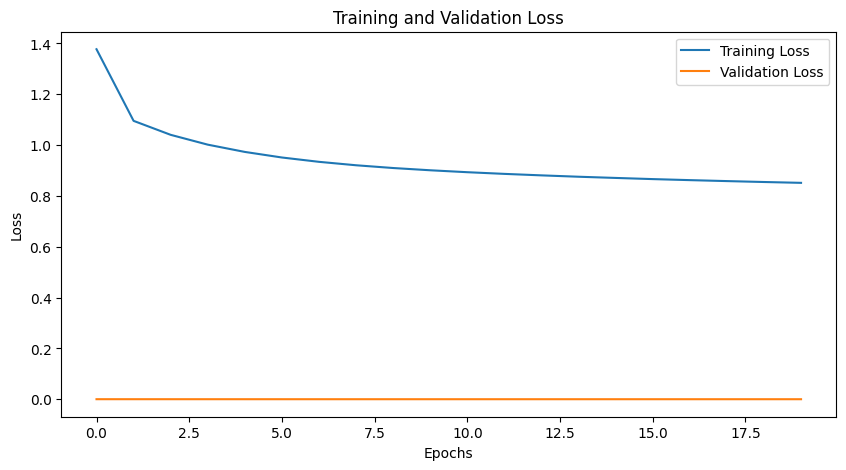

In [5]:
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Initial config with small dataset for tuning
config = {
    # Data and training parameters
    "datasource": 'nllb_segmented_data.csv',
    "batch_size": 64,
    "num_epochs": 100,
    "lr": 10**-5,
    'plateau_patience': 10,  # New for plateau detection
    'worsen_patience': 5,   # New for worsen detection
    'min_delta': 0.0005,    # Minimum improvement for loss
    'verbose': True,
    "data_length": 100000,
    
    # Model architecture parameters
    "seq_len": 250,
    "d_model": 512,        # Dimension of the model
    "num_layers": 6,       # Number of encoder/decoder layers (N)
    "num_heads": 8,        # Number of attention heads (h)
    "d_ff": 2048,         # Dimension of feed-forward network
    "dropout": 0.1,       # Dropout rate
    "max_grad_norm": 1.0,  # Gradient clipping
    "label_smoothing": 0.1,# Label smoothing factor
    
    # Vocabulary and tokenization
    'vocab_size': 30000,
    "tokenize_custom": {
        "english": False,
        "segmenter_three": True
    },
    'tokenize_method': 'segment',
    
    # File paths and model settings
    "file_path": 'english_zulu_models/english_zulu_seg_one',
    "model_folder": "weights",
    "lang_src": "english",
    "lang_tgt": "segmenter_three",
    "model_basename": "model_",
    "preload": "latest",
    "tokenizer_file": "tokenizers_{0}.json",
    "experiment_name": "english_zulu_models/english_zulu_seg_one/tensor_data",
    "random_seed": 20,
}


# Initialize first trainer - this builds vocabulary on full dataset
print("Initializing trainer with full dataset for vocabulary building...")
trainer = Seq2SeqTrainer(config)

# Modify data length for hyperparameter tuning
print("Reducing dataset size for hyperparameter tuning...")
trainer.config["data_length"] = 20000  # Smaller size for quick tuning
tune_trainer = Seq2SeqTrainer(trainer.config)

# Run hyperparameter optimization with small dataset
best_config, analysis = tune_trainer.tune_hyperparameters(
    num_samples=10,  # Number of trials
    num_epochs=5    # Epochs per trial
)

# Now increase dataset size for full training
print("Increasing dataset size for full training...")
tune_trainer.config["data_length"] = 100000  # Larger size for full training
train_trainer = Seq2SeqTrainer(tune_trainer.config)
train_trainer.train()



Initializing trainer with full dataset for vocabulary building...
Using device: cuda
Device name: NVIDIA A100 80GB PCIe
Device memory: 79.253662109375 GB
Original shape: (100000, 3)
Final shape: (100000, 3)
The config file has been saved on translation_trial/eng_zul_none
the dataset length: 100000
Tokenizer path: translation_trial/eng_zul_none/tokenizers/tokenizers_english.json
Tokenizer not found. Creating a new one...
Creating default Tokenizer
Tokenizer path: translation_trial/eng_zul_none/tokenizers/tokenizers_isizulu.json
Tokenizer not found. Creating a new one...
Creating default Tokenizer
Max length of source sentence: 77
Max length of target sentence: 53
Reducing dataset size for hyperparameter tuning...
Using device: cuda
Device name: NVIDIA A100 80GB PCIe
Device memory: 79.253662109375 GB
Original shape: (100000, 3)
Final shape: (20000, 3)
The config file has been saved on translation_trial/eng_zul_none
the dataset length: 20000
Tokenizer path: translation_trial/eng_zul_none/

2025-02-28 22:34:23,740	INFO worker.py:1654 -- Calling ray.init() again after it has already been called.
2025-02-28 22:34:23,836	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
[I 2025-02-28 22:34:23,846] A new study created in memory with name: optuna


/workspace/pytorch-transformer_2/translation_trial/eng_zul_none/ray_results


Trial name,epoch,train_loss,val_loss
training_function_16c0427f,4,7.59074,7.50997
training_function_4412a8f3,4,7.51569,7.49166
training_function_442cb80b,4,6.82053,7.11528
training_function_48131998,2,7.72602,7.68182
training_function_5cdc806d,2,7.89901,7.82673
training_function_62a3bea5,4,8.58667,8.4661
training_function_6b7ca251,4,7.30426,7.42761
training_function_6cc64e7e,4,7.71726,7.66322
training_function_9f3ff8dc,4,8.05277,7.91436
training_function_dc2ad673,4,6.9636,7.10229


2025-02-28 23:14:06,592	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/workspace/pytorch-transformer_2/translation_trial/eng_zul_none/ray_results/transformer_tune' in 0.0233s.
2025-02-28 23:14:06,599	INFO tune.py:1041 -- Total run time: 2382.76 seconds (2382.72 seconds for the tuning loop).



Best hyperparameters found:
{'lr': 0.0002061272326943589, 'd_model': 256, 'num_layers': 4, 'num_heads': 8, 'd_ff': 2048, 'dropout': 0.15482615128668842, 'label_smoothing': 0.061762487321112364, 'max_grad_norm': 1.0243239402716817}
Increasing dataset size for full training...
Using device: cuda
Device name: NVIDIA A100 80GB PCIe
Device memory: 79.253662109375 GB
Original shape: (100000, 3)
Final shape: (100000, 3)
The config file has been saved on translation_trial/eng_zul_none
the dataset length: 100000
Tokenizer path: translation_trial/eng_zul_none/tokenizers/tokenizers_english.json
Loading existing tokenizer from translation_trial/eng_zul_none/tokenizers/tokenizers_english.json
Tokenizer path: translation_trial/eng_zul_none/tokenizers/tokenizers_isizulu.json
Loading existing tokenizer from translation_trial/eng_zul_none/tokenizers/tokenizers_isizulu.json
Max length of source sentence: 77
Max length of target sentence: 53

Training with the following configuration:
Dataset size: 1000

Processing Epoch 00: 100%|██████████| 1250/1250 [01:48<00:00, 11.56it/s, loss=7.315]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: 
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: 
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: 
----------------------------------------------------------------------------------------------------
Epoch 0 - Validation Loss: 0.0022
Saved best model from epoch 0 with validation loss: 0.002179
Initial best loss set to 0.002179.


Processing Epoch 01: 100%|██████████| 1250/1250 [01:55<00:00, 10.78it/s, loss=6.755]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma noma
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: 
----------------------------------------------------------------------------------------------------
Epoch 1 - Validation Loss: 0.0020
Improvement: 0.002179 -> 0.002027
Saved best model from epoch 1 with validation loss: 0.002027


Processing Epoch 02: 100%|██████████| 1250/1250 [01:57<00:00, 10.67it/s, loss=6.299]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma noma kakhulu
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: kufanele ngesikhathi esifanayo
----------------------------------------------------------------------------------------------------
Epoch 2 - Validation Loss: 0.0018
Improvement: 0.002027 -> 0.001849
Saved best model from epoch 2 with validation loss: 0

Processing Epoch 03: 100%|██████████| 1250/1250 [01:56<00:00, 10.71it/s, loss=5.894]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma kakhulu ngisho ngisho ukudlala eziningi
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: ngenxa yalokho umsebenzi kufanele kube khona ngesikhathi esifanayo
----------------------------------------------------------------------------------------------------
Epoch 3 - Validation Loss: 0.0018
Improvement: 0.001849 ->

Processing Epoch 04: 100%|██████████| 1250/1250 [01:57<00:00, 10.64it/s, loss=5.755]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma ngempela ngisho ukudlala ukudlala enye izinhlobo
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: ngenxa yezizathu kufanele ngesikhathi esifanayo
----------------------------------------------------------------------------------------------------
Epoch 4 - Validation Loss: 0.0017
Improvement: 0.001757 -> 0.001688


Processing Epoch 05: 100%|██████████| 1250/1250 [01:57<00:00, 10.66it/s, loss=5.362]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma ngempela ngisho ngisho ukudlala ukwenza enye izingxenye eziningi
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: ngenxa yezizathu kakhulu kufanele kube ngesikhathi esizayo
----------------------------------------------------------------------------------------------------
Epoch 5 - Validation Loss: 0.0

Processing Epoch 06: 100%|██████████| 1250/1250 [01:56<00:00, 10.70it/s, loss=5.230]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma ngempela ngisho ukudlala ukudlala ukwenza enye yezindawo kakhulu casino
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza kahle kufanele kube njengoba kwenzeka ngesikhathi esizayo
----------------------------------------------------------------------------------------------------
Epoc

Processing Epoch 07: 100%|██████████| 1250/1250 [01:56<00:00, 10.70it/s, loss=4.826]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma ngempela ungakwazi ngisho ukudlala ukudlala ukwenza kube yinto eyodwa kakhulu izingxenye casino casino
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kepha amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kufanele ngesikhathi esifanayo
----------------------------------------------------------------------------------------

Processing Epoch 08: 100%|██████████| 1250/1250 [01:57<00:00, 10.67it/s, loss=4.388]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma ngempela ungakwazi ngisho ukudlala ukudlala ukwenza enye izingxenye kakhulu casino game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kufanele umholi njengoba kwenzeka ngesikhathi umsebenzi
------------------------------------------------------------------------------

Processing Epoch 09: 100%|██████████| 1250/1250 [01:57<00:00, 10.66it/s, loss=4.494]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma ngempela ungakwazi ngisho ekupheleni ukudlala ukwenza kube enye izingxenye kakhulu casino game game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kepha amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kufanele umholi njengoba kwenzeka ngesikhathi umsebenzi eqenjini
---------------------------------------------------------

Processing Epoch 10: 100%|██████████| 1250/1250 [01:56<00:00, 10.68it/s, loss=4.267]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma ngempela ungakwazi ngisho ukudlala umshini ukwenza kube enye yezindawo kakhulu casino casino
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: ukuze iqembu ngempumelelo kufanele umholi njengoba kwenzeka ngesikhathi umsebenzi eqenjini
-----------------------------------------------------------------------

Processing Epoch 11: 100%|██████████| 1250/1250 [01:57<00:00, 10.68it/s, loss=4.316]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma ngempela ungakwazi ngisho ekupheleni ukuthola ukudlala okwenza kube enye yezindawo ezithakazelisayo kakhulu casino game game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kufanele umholi njengoba kwenzeka ngesikhathi somsebenzi eqenjini
-------------------------------

Processing Epoch 12: 100%|██████████| 1250/1250 [01:57<00:00, 10.66it/s, loss=4.162]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma ngempela ungase ngisho ekupheleni ukudlala ukwenza enye yezindawo kakhulu casino game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kufanele umholi njengoba kwenzeka ngesikhathi somsebenzi eqenjini
----------------------------------------------------------------------

Processing Epoch 13: 100%|██████████| 1250/1250 [01:57<00:00, 10.63it/s, loss=3.774]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma ngempela ungakwazi ngisho ukuqeda ukudlala kahle ukwenza enye yezindawo ezithakazelisayo kakhulu casino game by game game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza kahle kufanele umholi njengoba kwenzeka ngesikhathi somsebenzi eqenjini
-----------------------------------------

Processing Epoch 14: 100%|██████████| 1250/1250 [01:57<00:00, 10.65it/s, loss=3.815]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma ngempela ungase ube nesikhathi ukuthola ukwenza enye yezindawo ezithakazelisayo kakhulu casino game game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kufanele umholi njengoba kwenzeka ngesikhathi somsebenzi eqenjini
---------------------------------------------------

Processing Epoch 15: 100%|██████████| 1250/1250 [01:57<00:00, 10.64it/s, loss=3.639]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma unenhlanhla impela ngisho ukudlala jackpot okwenza kube esinye izingxenye ezinhle kakhulu casino game game mobile game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kufanele umholi njengoba kwenzeka ngesikhathi somsebenzi eqenjini
-------------------------------------

Processing Epoch 16: 100%|██████████| 1250/1250 [01:57<00:00, 10.66it/s, loss=3.840]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma unenhlanhla impela ungase ngisho ukuqeda ukudlala umdlalo okwenza kube enye yezindawo ezithakazelisayo kakhulu ikhasino game mobile game mobile game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: angizange kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kufanele kubhekwe umholi umholi njengoba kwenzeka ngesikhathi u

Processing Epoch 17: 100%|██████████| 1250/1250 [01:56<00:00, 10.72it/s, loss=3.826]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma ngempela ungase ngisho ukuqeda ukudlala umdlalo okwenza kube enye yezindawo ezithakazelisayo kakhulu casino by iphone mobile game by game mobile game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kufanele umholi uma kwenzeka ngesikhathi umsebenzi eqenjini
------------

Processing Epoch 18: 100%|██████████| 1250/1250 [01:56<00:00, 10.69it/s, loss=3.536]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma ngempela ungase uze ufike ukudlala ku play okwenza kube enye yezindawo ezithakazelisayo kakhulu ikhasino ukhokha ikhasino mobile game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kufanele kuholele umholi njengoba kwenzeka ngesikhathi somsebenzi eqenjini
-------------

Processing Epoch 19: 100%|██████████| 1250/1250 [01:57<00:00, 10.65it/s, loss=3.508]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma unenhlanhla ungahle ngisho ukuthola ukudlala ukwenza kube enye yezindawo ezithakazelisayo kakhulu casino mobile game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kufanele kuholele umholi njengoba kunjalo kwenzeka ngesikhathi somsebenzi eqenjini
----------------------

Processing Epoch 20: 100%|██████████| 1250/1250 [01:57<00:00, 10.62it/s, loss=3.497]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma unenhlanhla ungahle ngisho ukufika ukudlala jackpot okwenza kube enye yezindawo ezithakazelisayo kakhulu casino by game mobile game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kufanele umholi njengoba kwenzeka ngesikhathi somsebenzi eqenjini
------------------------

Processing Epoch 21: 100%|██████████| 1250/1250 [01:57<00:00, 10.60it/s, loss=3.509]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma unenhlanhla ungase ngisho kuze kufike ku ukuthola i ukudlala jackpot okwenza kube esinye izingxenye okuthakazelisayo kakhulu casino mobile game mobile game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza kahle kufanele umholi njengoba kunjalo ngesikhathi somsebenzi eqenjini
--------

Processing Epoch 22: 100%|██████████| 1250/1250 [01:57<00:00, 10.63it/s, loss=3.322]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma unenhlanhla ungahle uze ufike ku ukudlala okwenza kube enye yezindawo ezithakazelisayo kakhulu ikhasino pay game mobile game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kufanele kubhekwe umholi umholi njengoba kwenzeka ngesikhathi somsebenzi eqenjini
---------------

Processing Epoch 23: 100%|██████████| 1250/1250 [01:57<00:00, 10.62it/s, loss=3.391]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma ngempela ungase ngisho ukuqeda ukudlala jackpot okwenza kube enye yezindawo ezithakazelisayo kakhulu ikhasino pay at mobile game mobile game mobile game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: angizange kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza kahle kufanele umholi njengoba kwenzeka ngesikhathi somsebenzi eqenjini


Processing Epoch 24: 100%|██████████| 1250/1250 [01:57<00:00, 10.66it/s, loss=3.290]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma ngempela ungahle uze ufike ukudlala jackpot ukwenza kube enye yezindawo ezithakazelisayo kakhulu ekhasino ukukhokha slot game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: angizange kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kufanele kuholele umholi njengoba kwenzeka ngesikhathi somsebenzi eqenjini
-----------

Processing Epoch 25: 100%|██████████| 1250/1250 [01:56<00:00, 10.69it/s, loss=3.343]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma unenhlanhla ungakwazi ngisho ukuthola ukudlala jackpot ukwenza kube omunye izingxenye okuthakazelisayo kakhulu ekhasino ukhokhe slots mobile game mobile game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kumele kuholele umholi njengoba kunjalo ngesikhathi somsebenzi e

Processing Epoch 26: 100%|██████████| 1250/1250 [01:57<00:00, 10.68it/s, loss=3.220]


    SOURCE: if you are really lucky you may even end up getting to play the progressive jackpot making it one of the most exciting parts of the casino pay by mobile slot game
    TARGET: uma unenhlanhla ngempela ungaqeda kuze kokuthola ukudlala jackpot okuqhubekayo okwenza kube omunye izingxenye ejabulisa kakhulu we pay yekhasino mobile slot game
 PREDICTED: uma unenhlanhla ungase ngisho ekupheleni ukuthola ukudlala jackpot traffic wenza kube omunye izingxenye okuthakazelisayo kakhulu ekhasino ukhokhe mobile game
    SOURCE: i had no choice but to ring the police
    TARGET: ngangingenakukhetha kodwa ukubiza amaphoyisa
 PREDICTED: kodwa amaphoyisa
    SOURCE: for a team to work effectively it must be led by a leader as is the case during a work in group
    TARGET: ukuze iqembu lisebenze ngokuphumelelayo kufanele liholwa umholi njengoba kunjalo ngesikhathi umsebenzi weqembu
 PREDICTED: eqenjini ukusebenza ngempumelelo kufanele kuholele umholi njengoba kunjalo ngesikhathi somsebenzi pha

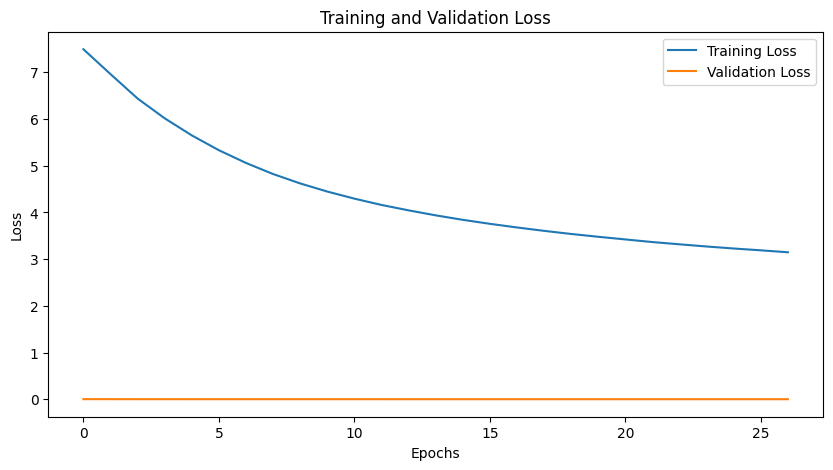

In [6]:
# Initial config with small dataset for tuning

if torch.cuda.is_available():
    torch.cuda.empty_cache()

config = {
    # Data and training parameters
    "datasource": 'final_merged_data_nllb.csv',
    "batch_size": 64,
    "num_epochs": 100,
    "lr": 10**-5,
    'plateau_patience': 10,  # New for plateau detection
    'worsen_patience': 5,   # New for worsen detection
    'min_delta': 0.0005,    # Minimum improvement for loss
    'verbose': True,
    "data_length": 100000,
    
    # Model architecture parameters
    "seq_len": 100,
    "d_model": 512,        # Dimension of the model
    "num_layers": 6,       # Number of encoder/decoder layers (N)
    "num_heads": 8,        # Number of attention heads (h)
    "d_ff": 2048,         # Dimension of feed-forward network
    "dropout": 0.1,       # Dropout rate
    "max_grad_norm": 1.0,  # Gradient clipping
    "label_smoothing": 0.1,# Label smoothing factor
    
    # Vocabulary and tokenization
    'vocab_size': 30000,
    "tokenize_custom": {
        "english": False,
        "isizulu": False
    },
    'tokenize_method': 'segment',
    
    # File paths and model settings
    "file_path": 'english_zulu_models/english_zulu_none',
    "model_folder": "weights",
    "lang_src": "english",
    "lang_tgt": "isizulu",
    "model_basename": "model_",
    "preload": "latest",
    "tokenizer_file": "tokenizers_{0}.json",
    "experiment_name": "english_zulu_models/english_zulu_nonetensor_data",
    "random_seed": 20,
}

# Initialize first trainer - this builds vocabulary on full dataset
print("Initializing trainer with full dataset for vocabulary building...")
trainer = Seq2SeqTrainer(config)

# Modify data length for hyperparameter tuning
print("Reducing dataset size for hyperparameter tuning...")
trainer.config["data_length"] = 20000  # Smaller size for quick tuning
tune_trainer = Seq2SeqTrainer(trainer.config)

# Run hyperparameter optimization with small dataset
best_config, analysis = tune_trainer.tune_hyperparameters(
    num_samples=10,  # Number of trials
    num_epochs=5    # Epochs per trial
)

# Now increase dataset size for full training
print("Increasing dataset size for full training...")
tune_trainer.config["data_length"] = 100000  # Larger size for full training
train_trainer = Seq2SeqTrainer(tune_trainer.config)
train_trainer.train()